# Inspecting storage variables

Here we use birdy's WPS client to launch the GR4JCN hydrological model on the server and analyze the state variables. 

In [1]:
from birdy import WPSClient

from example_data import TESTDATA
import datetime as dt
from urllib.request import urlretrieve
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os

# Set environment variable WPS_URL to "http://localhost:9099" to run on the default local server
url = os.environ.get("WPS_URL", "https://pavics.ouranos.ca/twitcher/ows/proxy/raven/wps")
wps = WPSClient(url)

In [2]:
# The model parameters. Can either be a string of comma separated values, a list, an array or a named tuple. 
params = '0.529, -3.396, 407.29, 1.072, 16.9, 0.947'

# Forcing files
ts=TESTDATA['raven-gr4j-cemaneige-nc-ts']

# Model configuration parameters
config = dict(
    start_date=dt.datetime(2000, 1, 1),
    end_date=dt.datetime(2002, 1, 1),
    area=4250.6,
    elevation=843.0,
    latitude=54.4848,
    longitude=-123.3659,
    )

# Let's call the model
resp = wps.raven_gr4j_cemaneige(ts=str(ts), params = params, **config)

# And get the response
# With `asobj` set to False, only the reference to the output is returned in the response. 
# Setting `asobj` to True will retrieve the actual files and copy the locally. 
[hydrograph, storage, solution, diagnostics, rv] = resp.get(asobj=True)

Since we requested output objects, we can simply access the output objects. This time, instead of plotting hydrographs, lets plot the different state variables, such as snow:

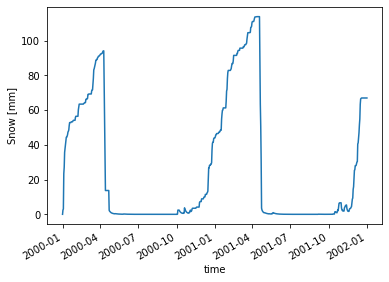

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

storage['Snow'].plot()

In this case, let's plot the first layer of soil water:

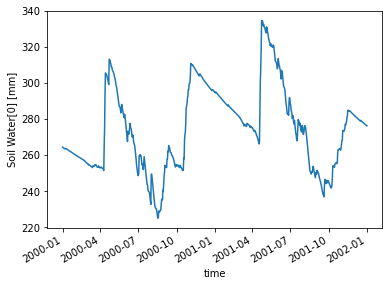

In [4]:
storage['Soil Water[0]'].plot()

We can plot basically anything that is among the list of variables here:

In [5]:
print(storage)

<xarray.Dataset>
Dimensions:                    (time: 732)
Coordinates:
  * time                       (time) datetime64[ns] 2000-01-01 ... 2002-01-01
Data variables:
    rainfall                   (time) float64 ...
    snowfall                   (time) float64 ...
    Channel Storage            (time) float64 ...
    Reservoir Storage          (time) float64 ...
    Rivulet Storage            (time) float64 ...
    Surface Water              (time) float64 ...
    Cum. Losses to Atmosphere  (time) float64 ...
    Ponded Water               (time) float64 ...
    Soil Water[0]              (time) float64 ...
    Soil Water[1]              (time) float64 ...
    Soil Water[2]              (time) float64 ...
    Soil Water[3]              (time) float64 ...
    Snow                       (time) float64 ...
    Convolution Storage[0]     (time) float64 ...
    Convolution Storage[1]     (time) float64 ...
    Total                      (time) float64 ...
    Cum. Input                 (

A user could also download the netcdf file directly by calling the resp_get function but using asobj=False


In [6]:
[hydrograph, storage, solution, diagnostics, rv] = resp.get(asobj=False)
print(storage)

http://localhost:9099/outputs/85ac85d6-8b18-11ea-bece-b8ca3a8f5177/raven-gr4j-cemaneige-sim-0_WatershedStorage.nc
